## a.

# Loading the dataset and information

In [124]:
import pandas as pd 

In [125]:
data = pd.read_csv('framingham.csv')

In [127]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [129]:
data.shape

(4240, 16)

#### features information 

In [130]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### missing values

In [131]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose are columns with missing values. 

## b.

# Preprocessing 

## Handeling duplicate rows

In [132]:
data.duplicated().sum()

0

#### No duplicated rows

## Handeling missing ones

#### one method for handeling is dropping missing ones

In [133]:
data = data.dropna()

In [134]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### all missing ones have been deleted!

### feature distribution 

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ESMAEIL\AppData\Local\Temp\ipykernel_9892\1607762813.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

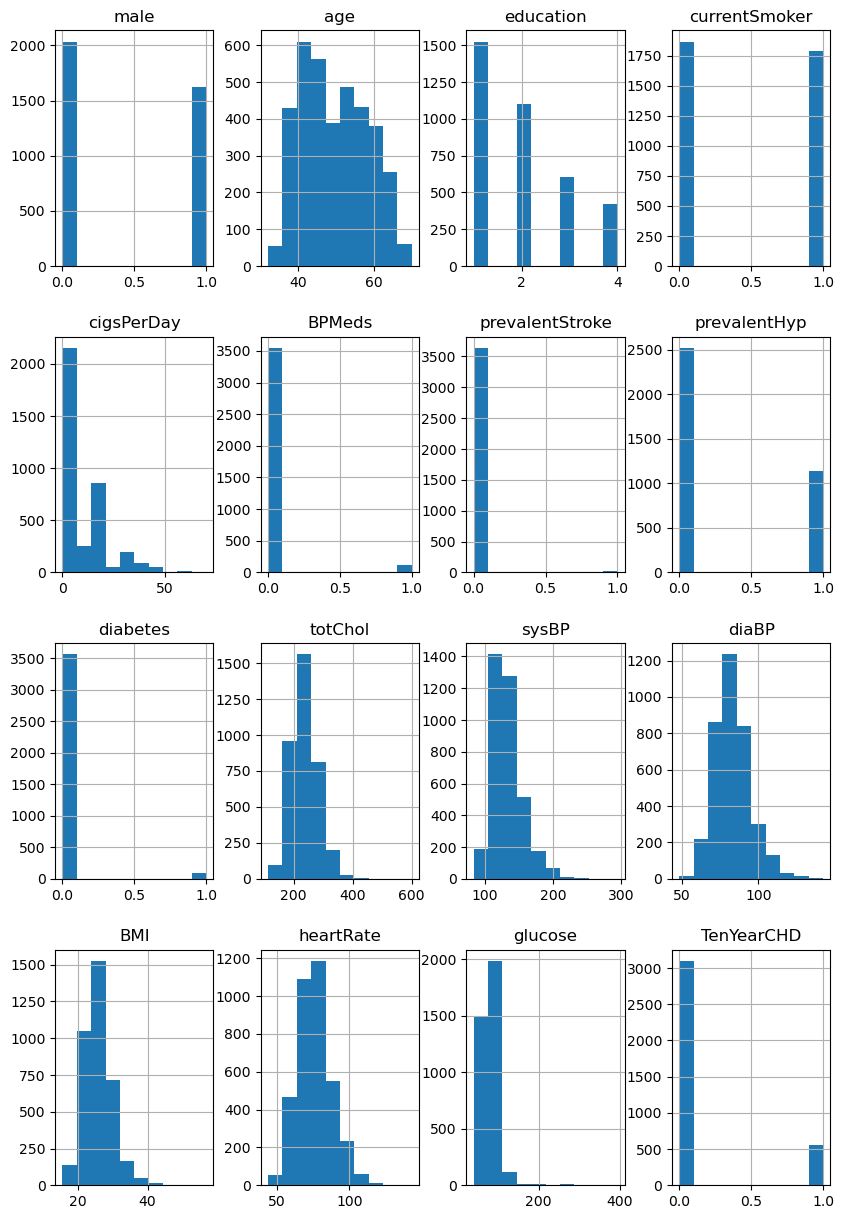

In [136]:
%matplotlib inline 
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
data.hist(ax = ax)

## Handeling Outlier

### we can use boxplot to show existence of outlier data

<Axes: >

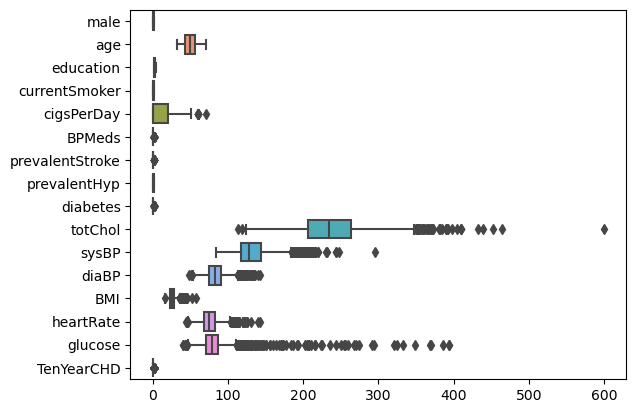

In [16]:
sns.boxplot(data=data, orient="h")

### some features have outlier, so we can filter them out from the dataset

### we have coded a function for handeling the outliers by Interquartile Range (IQR) method as follows:

In [17]:
import numpy as np
def detect_outlier(data):
    q1, q3 = np.percentile(np.sort(data), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    return lower_bound, upper_bound


In [18]:
outlier_indices = []
for column in data.columns:
    if data[column].dtype != 'object':  
        lower_bound, upper_bound = detect_outlier(data[column])
        outlier_indices.extend(data[(data[column] < lower_bound) | (data[column] > upper_bound)].index)

filtered_data = data.drop(outlier_indices)

filtered_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### filtered data without outliers

<Axes: >

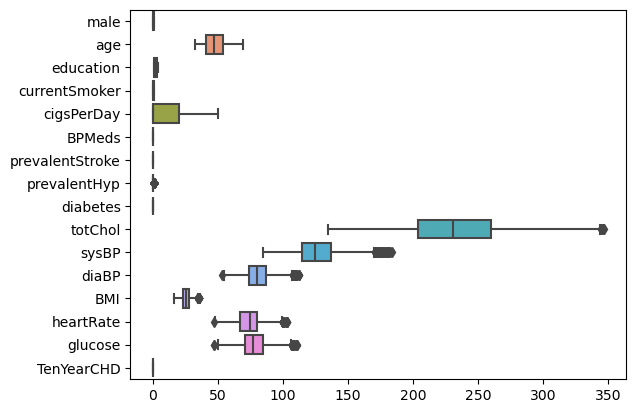

In [19]:
sns.boxplot(data=filtered_data, orient="h")

### As you can see there is no outlier data left in the dataset!

#### Feature Scaling 

In [137]:
columns = [col for col in data.columns if col!= 'TenYearCHD'  ]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = pd.DataFrame(scaler.fit_transform(data.iloc[:, 0:15]), columns=columns)

In [139]:
scaled_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1.0,0.473684,0.000000,1.0,0.014286,0.0,0.0,1.0,0.0,0.410678,0.451537,0.465608,0.252787,0.222222,0.129944
3654,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.0,0.193018,0.203310,0.338624,0.101066,0.212121,0.079096
3655,0.0,0.526316,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.320329,0.236407,0.370370,0.143723,0.363636,0.189266
3656,1.0,0.210526,0.666667,0.0,0.000000,0.0,0.0,1.0,0.0,0.147844,0.271868,0.529101,0.243820,0.232323,0.090395


# c.

### Best feature selection  

In [140]:
from sklearn.feature_selection import SelectKBest, chi2

In [141]:
y= data.iloc[:,-1]
X = data.iloc[:, 0:15]
X.shape

(3658, 15)

In [142]:
feature_names = data.columns

In [143]:
best_features = SelectKBest(score_func=chi2, k=10)
best_X = best_features.fit_transform(X, y)

selected_indices = best_features.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_indices]

print("Selected Features:")
print('\n')
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:


male
age
cigsPerDay
BPMeds
prevalentHyp
diabetes
totChol
sysBP
diaBP
glucose


### best features are above ones

# d.

In [173]:
y = data['TenYearCHD']
X = data.drop('TenYearCHD', axis= 1)

In [174]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6)

# e. 

#### Training a KNN model 

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [176]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## f.

#### confusion matrix

In [177]:
prediction = knn.predict(X_test)

In [178]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, prediction)
confusion_matrix

array([[1736,  138],
       [ 266,   55]], dtype=int64)

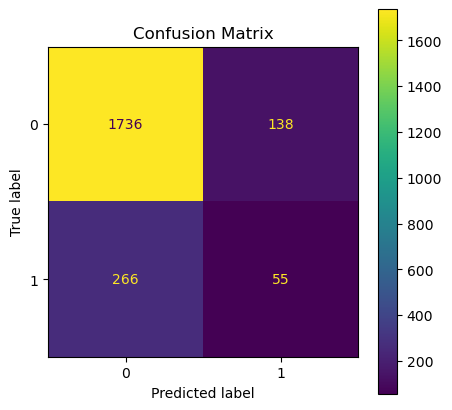

In [179]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
 
display = ConfusionMatrixDisplay(confusion_matrix )
 
ax.set(title='Confusion Matrix')
  
display.plot(ax=ax);

#### True Negative (TP) = 1736 data items are predicted as True Negative 


#### False Positive (FP) = 138 data items  are predicted as false positive 

#### False Negative (FN) =266  data items are predicted as false Negative 

#### True Positive (TN) = 55 data items  are predicted as True positive 

#### accuracy

In [180]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, prediction)

In [181]:
acc

0.8159453302961276

#### R2_score

In [182]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
r2

-0.4741486217363695

## g.

### KNN with new distance metric  

In [183]:
knn2 = KNeighborsClassifier(n_neighbors = 3, metric= 'manhattan')

In [184]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [185]:
prediction2 = knn2.predict(X_test)

### confusion matrixs 

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, prediction2)
confusion_matrix2

array([[1745,  129],
       [ 276,   45]], dtype=int64)

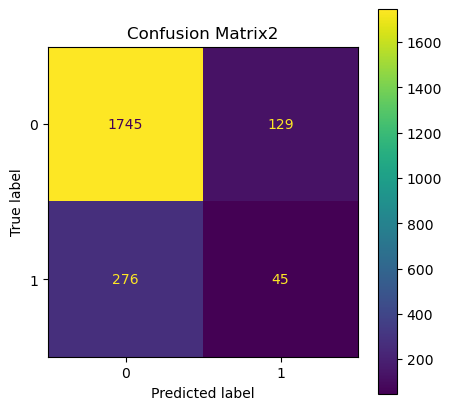

In [187]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
 
display = ConfusionMatrixDisplay(confusion_matrix2 )
 
ax.set(title='Confusion Matrix2')
  
display.plot(ax=ax);

### Accuracy 

In [188]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, prediction2)
acc2 

0.8154897494305239

#### Acurracy is almost the same between the Manhattan and Euclidean metrics 

### R_2 Score

In [189]:
from sklearn.metrics import r2_score
r2_2 = r2_score(y_test, prediction2)
r2_2

-0.4777975044634397

#### the performance has not been improved by changing the distance metric 

## h.

## all preprocessing steps have been taken in the part b 